In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark import SparkConf

In [2]:
sc = SparkSession.builder \
    .master("local") \
    .appName("Churn") \
    .getOrCreate()

In [3]:
sqlContext = SQLContext(sparkContext=sc.sparkContext, sparkSession=sc)

### 1. Reading the data Churn.csv into pyspark dataframe.

In [4]:
df = sqlContext.read.csv("Churn.csv",header = True,inferSchema = True)

In [5]:
df.show(10,truncate= True)

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account Length|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Churn|Intl Plan|VMail Plan|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State|Area Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|    0|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|    0|  

In [6]:
df.registerTempTable("CHURN_TABLE")

In [7]:
df.printSchema()


root
 |-- Account Length: integer (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: double (nullable = true)
 |-- Eve Mins: double (nullable = true)
 |-- Night Mins: double (nullable = true)
 |-- Intl Mins: double (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Intl Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: double (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: double (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: double (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)



### Checking null values for each column

In [8]:
names = df.schema.names
for name in names:
    print(name + ": " + str(df.where(df[name].isNull()).count()))

Account Length: 0
VMail Message: 0
Day Mins: 0
Eve Mins: 0
Night Mins: 0
Intl Mins: 0
CustServ Calls: 0
Churn: 0
Intl Plan: 0
VMail Plan: 0
Day Calls: 0
Day Charge: 0
Eve Calls: 0
Eve Charge: 0
Night Calls: 0
Night Charge: 0
Intl Calls: 0
Intl Charge: 0
State: 0
Area Code: 0
Phone: 0


### 2. Showing summary statistics for each of the variables

In [9]:
df.describe('Account Length', 'VMail Message','Day Mins', 'Eve Mins','Night Mins').show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|    Account Length|     VMail Message|          Day Mins|          Eve Mins|        Night Mins|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|              3333|              3333|              3333|              3333|              3333|
|   mean|101.06480648064806| 8.099009900990099|179.77509750975116|200.98034803480346|200.87203720372048|
| stddev|39.822105928595676|13.688365372038598| 54.46738920237146|50.713844425811985| 50.57384701365836|
|    min|                 1|                 0|               0.0|               0.0|              23.2|
|    max|               243|                51|             350.8|             363.7|             395.0|
+-------+------------------+------------------+------------------+------------------+------------------+



In [10]:
df.describe('Intl Mins', 'CustServ Calls','Churn', 'Intl Plan','VMail Plan').show()

+-------+------------------+------------------+-------------------+------------------+-------------------+
|summary|         Intl Mins|    CustServ Calls|              Churn|         Intl Plan|         VMail Plan|
+-------+------------------+------------------+-------------------+------------------+-------------------+
|  count|              3333|              3333|               3333|              3333|               3333|
|   mean|10.237293729372933|1.5628562856285628|0.14491449144914492|0.0969096909690969|0.27662766276627665|
| stddev| 2.791839548408416|1.3154910448664752|  0.352067423624126|0.2958791454844147| 0.4473978703800645|
|    min|               0.0|                 0|                  0|                 0|                  0|
|    max|              20.0|                 9|                  1|                 1|                  1|
+-------+------------------+------------------+-------------------+------------------+-------------------+



In [11]:
df.describe('Day Calls', 'Day Charge','Eve Calls', 'Eve Charge','Night Calls','Night Charge').show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|         Day Calls|        Day Charge|         Eve Calls|        Eve Charge|       Night Calls|     Night Charge|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|              3333|              3333|              3333|              3333|              3333|             3333|
|   mean|100.43564356435644|30.562307230723093|100.11431143114311|17.083540354035392|100.10771077107711|9.039324932493264|
| stddev|20.069084207300893| 9.259434553930495| 19.92262529394312| 4.310667643110347|19.568609346058544|2.275872837660027|
|    min|                 0|               0.0|                 0|               0.0|                33|             1.04|
|    max|               165|             59.64|               170|             30.91|               175|            17.77|
+-------+-------

In [12]:
df.describe('Intl Calls', 'Intl Charge','State', 'Area Code','Phone').show()

+-------+------------------+------------------+-----+------------------+--------+
|summary|        Intl Calls|       Intl Charge|State|         Area Code|   Phone|
+-------+------------------+------------------+-----+------------------+--------+
|  count|              3333|              3333| 3333|              3333|    3333|
|   mean|4.4794479447944795| 2.764581458145804| null|437.18241824182417|    null|
| stddev|2.4612142705460953|0.7537726126630451| null| 42.37129048560661|    null|
|    min|                 0|               0.0|   AK|               408|327-1058|
|    max|                20|               5.4|   WY|               510|422-9964|
+-------+------------------+------------------+-----+------------------+--------+



### Creating a new dataframe from existing data frame

In [13]:
df1 = sqlContext.sql("SELECT * FROM CHURN_TABLE")
df1.show(5)

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account Length|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Churn|Intl Plan|VMail Plan|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State|Area Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|    0|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|    0|  

### Function to replace spaces in column names with '_'

In [14]:
def rename_columns(df, columns):
    if isinstance(columns, dict):
        for old_name, new_name in columns.items():
            df = df.withColumnRenamed(old_name, new_name)
        return df
    else:
        raise ValueError("'columns' should be a dict, like {'old_name_1':'new_name_1', 'old_name_2':'new_name_2'}")

In [15]:
df2 = rename_columns(df1, {'Account Length':'Account_Length','VMail Message':'VMail_Message','Day Mins':'Day_Mins','Eve Mins':'Eve_Mins','Night Mins':'Night_Mins','Intl Mins':'Intl_Mins','CustServ Calls':'CustServ_Calls','Intl Plan':'Intl_Plan','VMail Plan':'VMail_Plan','Day Calls':'Day_Calls','Day Charge':'Day_Charge','Eve Calls':'Eve_Calls','Eve Charge':'Eve_Charge','Night Calls':'Night_Calls','Night Charge':'Night_Charge','Intl Calls':'Intl_Calls','Intl Charge':'Intl_Charge','Area Code':'Area_Code'})

In [16]:
df2.show(5)

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account_Length|VMail_Message|Day_Mins|Eve_Mins|Night_Mins|Intl_Mins|CustServ_Calls|Churn|Intl_Plan|VMail_Plan|Day_Calls|Day_Charge|Eve_Calls|Eve_Charge|Night_Calls|Night_Charge|Intl_Calls|Intl_Charge|State|Area_Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|    0|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|    0|  

### Registering dataframe as CHURN_TABLE1

In [17]:
df2.registerTempTable("CHURN_TABLE1")

### Creating new dataframe with CHURN column at the end

In [18]:
df3 = sqlContext.sql("SELECT Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,VMail_Plan,\
                      Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,\
                      State,Area_Code,Phone,Churn FROM CHURN_TABLE1")
df3.show(4)

+--------------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+-----+
|Account_Length|VMail_Message|Day_Mins|Eve_Mins|Night_Mins|Intl_Mins|CustServ_Calls|Intl_Plan|VMail_Plan|Day_Calls|Day_Charge|Eve_Calls|Eve_Charge|Night_Calls|Night_Charge|Intl_Calls|Intl_Charge|State|Area_Code|   Phone|Churn|
+--------------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+-----+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|    0|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|        

In [19]:
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import requests
requests.packages.urllib3.disable_warnings()

In [20]:
df3.registerTempTable("CHURN_TABLE2")

In [21]:
df5 = sqlContext.sql("SELECT * FROM CHURN_TABLE2")

In [22]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

In [23]:
from IPython.display import display, HTML, display_html #usefull to display wide tables
from pyspark_dist_explore import Histogram, hist, distplot, pandas_histogram
%matplotlib inline

### Function to check storage level statistics

In [24]:
from pyspark.storagelevel import StorageLevel         

def storageLevel(self): 
    java_storage_level = self._jdf.storageLevel() 

    storage_level = StorageLevel(java_storage_level.useDisk(), java_storage_level.useMemory(), java_storage_level.useOffHeap(), java_storage_level.deserialized(), java_storage_level.replication()) 
    return storage_level 
    
storageLevel(df5)  

StorageLevel(False, False, False, False, 1)

In [25]:
#def persist(self, storageLevel=StorageLevel.MEMORY_AND_DISK): 
#    self.is_cached = True 
#    javaStorageLevel = self._sc._getJavaStorageLevel(storageLevel) 
#    self._jdf.persist(javaStorageLevel) 
#    return self 

In [26]:
#persist(df5)

In [27]:
#def unpersist(self, blocking=False):
#    self.is_cached = False
#    self._jdf.unpersist(blocking)
#    return self


In [28]:
#unpersist(df5)

In [29]:
#storageLevel(df5) 

### Cache the dataframe

In [30]:
def cache(self):
    self.is_cached = True
    self._jdf.cache()
    return self

In [31]:
cache(df5)

DataFrame[Account_Length: int, VMail_Message: int, Day_Mins: double, Eve_Mins: double, Night_Mins: double, Intl_Mins: double, CustServ_Calls: int, Intl_Plan: int, VMail_Plan: int, Day_Calls: int, Day_Charge: double, Eve_Calls: int, Eve_Charge: double, Night_Calls: int, Night_Charge: double, Intl_Calls: int, Intl_Charge: double, State: string, Area_Code: int, Phone: string, Churn: int]

In [32]:
storageLevel(df5)

StorageLevel(True, True, False, True, 1)

In [33]:
import plotly as pl 
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import requests
requests.packages.urllib3.disable_warnings()
from plotly.graph_objs import Scatter, Figure, Layout
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [34]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Account_Length').alias('Acc_Length_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Account_Length').alias('Acc_Length_C1') ) 
#filtered_by_churn_01 = filtered_by_churn_0.rdd.collect()
#filtered_by_churn_10 = filtered_by_churn_1.rdd.collect()

#df8 = sc.createDataFrame(filtered_by_churn_01)

In [35]:
init_notebook_mode(connected=True)

In [36]:
filtered_by_churn_1.show(5)

+-------------+
|Acc_Length_C1|
+-------------+
|           65|
|          161|
|           77|
|           12|
|          135|
+-------------+
only showing top 5 rows



### Using plotly to draw histograms
### 3.Plot histogram of various variables.

In [37]:
import plotly

In [38]:
sqlContext.sql("SELECT Churn, count(*) as count FROM CHURN_TABLE2 group by Churn").show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  483|
|    0| 2850|
+-----+-----+



In [40]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Account_Length').alias('Acc_Length_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Account_Length').alias('Acc_Length_C1') ) 
#filtered_by_churn_01 = filtered_by_churn_0.rdd.collect()
#filtered_by_churn_10 = filtered_by_churn_1.rdd.collect()

#df8 = sc.createDataFrame(filtered_by_churn_01)
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Acc_Length_C0'], name="Acc_Length_C0",histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Acc_Length_C1'], name="Acc_Length_C1",histnorm='probability')
    ])

iplot(data, filename="ACC_Length")

### Account Length between 100 - 120 shows high probability of churn otherwise distribution is normal between churn and no churn

In [41]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Day_Mins').alias('Day_Mins_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Day_Mins').alias('Day_Mins_C1') )  

In [42]:
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Day_Mins_C0'], name="Day_Mins_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Day_Mins_C1'], name="Day_Mins_C1", histnorm='probability')
    ])

iplot(data, filename="Day_Mins")

### Probability of churn is higher for customers with more day minutes or more than 220 day minutes.

In [43]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Eve_Mins').alias('Eve_Mins_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Eve_Mins').alias('Eve_Mins_C1') )  

In [44]:
plotly.__version__

'2.5.1'

In [45]:
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Eve_Mins_C0'], name="Eve_Mins_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Eve_Mins_C1'], name="Eve_Mins_C1", histnorm='probability')
    ])

iplot(data, filename="Eve_Mins")

### Peak in the probability (0.0641) of churn is seen if the evening minutes is around 210. Then a downward trend is observed but still probability of churn is higher than that of non -  churn customers.

In [46]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Night_Mins').alias('Night_Mins_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Night_Mins').alias('Night_Mins_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Night_Mins_C0'], name="Night_Mins_C0",histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Night_Mins_C1'], name="Night_Mins_C1",histnorm='probability')
    ])

iplot(data, filename="Night_Mins")

### Inference from above two graphs is that if the evening or night minutes are around 210-220 probability of churn is at peak

In [47]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Intl_Mins').alias('Intl_Mins_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Intl_Mins').alias('Intl_Mins_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Intl_Mins_C0'], name="Intl_Mins_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Intl_Mins_C1'], name="Intl_Mins_C1", histnorm='probability')
    ])

iplot(data, filename="Intl_Mins")

### If the international minutes are on a higher side like 14 then probability of churn is higher while the distribution of non-churn customers is normal.

In [48]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('CustServ_Calls').alias('CustServ_Calls_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('CustServ_Calls').alias('CustServ_Calls_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['CustServ_Calls_C0'], name="CustServ_Calls_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['CustServ_Calls_C1'], name="CustServ_Calls_C1", histnorm='probability')
    ])

iplot(data, filename="CustServ_Calls")

### Probability of non-churn customers is high for less customer service calls while probability of churn customers is higher for more number of customer service calls.

In [49]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Intl_Plan').alias('Intl_Plan_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Intl_Plan').alias('Intl_Plan_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Intl_Plan_C0'], name="Intl_Plan_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Intl_Plan_C1'], name="Intl_Plan_C1", histnorm='probability')
    ])

iplot(data, filename="Intl_Plan")

### Probability of churn for customers with international plan is relatively much high compared to non-churn customers

In [50]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('VMail_Plan').alias('VMail_Plan_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('VMail_Plan').alias('VMail_Plan_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['VMail_Plan_C0'], name="VMail_Plan_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['VMail_Plan_C1'], name="VMail_Plan_C1", histnorm='probability')
    ])

iplot(data, filename="VMail_Plan")

### Probability of churn customers higher for without VMail Plan

In [51]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Day_Calls').alias('Day_Calls_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Day_Calls').alias('Day_Calls_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Day_Calls_C0'], name="Day_Calls_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Day_Calls_C1'], name="Day_Calls_C1", histnorm='probability')
    ])

iplot(data, filename="Day_Calls")

### Probability of churn is high if no. of Day Calls is on a higher trend

In [52]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Day_Charge').alias('Day_Charge_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Day_Charge').alias('Day_Charge_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Day_Charge_C0'], name="Day_Charge_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Day_Charge_C1'], name="Day_Charge_C1", histnorm='probability')
    ])

iplot(data, filename="Day_Charge")

### Probability of churn is high if Day Charge is on a higher trend

In [53]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Eve_Calls').alias('Eve_Calls_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Eve_Calls').alias('Eve_Calls_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Eve_Calls_C0'], name="Eve_Calls_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Eve_Calls_C1'], name="Eve_Calls_C1", histnorm='probability')
    ])

iplot(data, filename="Eve_Calls")

### No significant observation between evening calls and churn

In [54]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Eve_Charge').alias('Eve_Charge_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Eve_Charge').alias('Eve_Charge_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Eve_Charge_C0'], name="Eve_Charge_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Eve_Charge_C1'], name="Eve_Charge_C1", histnorm='probability')
    ])

iplot(data, filename="Eve_Charge")

### We see relative high churn value for Eve Charge from 20.75 to 24.75

In [55]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Night_Calls').alias('Night_Calls_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Night_Calls').alias('Night_Calls_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Night_Calls_C0'], name="Night_Calls_C0",histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Night_Calls_C1'], name="Night_Calls_C1",histnorm='probability')
    ])

iplot(data, filename="Night_Calls")

### There is no significant observation from above histogram 

In [56]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Night_Charge').alias('Night_Charge_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Night_Charge').alias('Night_Charge_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Night_Charge_C0'], name="Night_Charge_C0",histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Night_Charge_C1'], name="Night_Charge_C1",histnorm='probability')
    ])

iplot(data)

### Peak probability value 6%for churn is seen at Night charge of 9.6 to 9.79

In [57]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Intl_Calls').alias('Intl_Calls_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Intl_Calls').alias('Intl_Calls_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Intl_Calls_C0'], name="Intl_Calls_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Intl_Calls_C1'], name="Intl_Calls_C1", histnorm='probability')
    ])

iplot(data)

### Downward trend is visible for increase in number of International Calls

In [58]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Intl_Charge').alias('Intl_Charge_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Intl_Charge').alias('Intl_Charge_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['Intl_Charge_C0'], name="Intl_Charge_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['Intl_Charge_C1'], name="Intl_Charge_C1", histnorm='probability')
    ])

iplot(data)

### If the international charge is between 3.5 and 4 then probability of churn is higher compared to no churn customers

In [59]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('State').alias('State_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('State').alias('State_C1'))
data = Data([
        Histogram(x=filtered_by_churn_0.toPandas()['State_C0'], name="State_C0", histnorm='probability'),
        Histogram(x=filtered_by_churn_1.toPandas()['State_C1'], name="State_C1", histnorm='probability')
    ])

iplot(data)

### Probability of churn is maximum for two sates NJ and TX.

In [60]:
import plotly.graph_objs as go

In [61]:
State_C0 = go.Box(
    y=filtered_by_churn_0.toPandas()['State_C0'],
    name='State_C0',
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)
State_C1 = go.Box(
    y=filtered_by_churn_1.toPandas()['State_C1'],
    name='State_C1'
)
data = [State_C0, State_C1]
iplot(data)

In [62]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Intl_Calls').alias('Intl_Calls_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Intl_Calls').alias('Intl_Calls_C1'))

trace0 = go.Box(x=filtered_by_churn_0.toPandas()['Intl_Calls_C0'],
                name='Intl_Calls_C0',
                jitter = 0.3,
                pointpos = -1.8,
                boxpoints = 'suspectedoutliers',
                marker = dict(
                    color = 'rgb(7,40,89)'),
                line = dict(
                    color = 'rgb(7,40,89)'))
trace1 = go.Box(x=filtered_by_churn_1.toPandas()['Intl_Calls_C1'],name='Intl_Calls_C1')
data = [trace0, trace1]
iplot(data)

### Median for International calls with and without churn is 4

In [63]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Intl_Charge').alias('Intl_Charge_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Intl_Charge').alias('Intl_Charge_C1'))

trace0 = go.Box(x=filtered_by_churn_0.toPandas()['Intl_Charge_C0'],name='Intl_Charge_C0')
trace1 = go.Box(x=filtered_by_churn_1.toPandas()['Intl_Charge_C1'],name='Intl_Charge_C1')
data = [trace0, trace1]
iplot(data)

### There is slight deviation of median of International charge with churn and without churn

In [64]:
filtered_by_churn_0 = df5.filter(F.col('churn') == 0).select(F.col('Account_Length').alias('Account_Length_C0'))
filtered_by_churn_1 = df5.filter(F.col('churn') == 1).select(F.col('Account_Length').alias('Account_Length_C1'))

trace0 = go.Box(x=filtered_by_churn_0.toPandas()['Account_Length_C0'],name='Account_Length_C0')
trace1 = go.Box(x=filtered_by_churn_1.toPandas()['Account_Length_C1'],name='Account_Length_C1')
data = [trace0, trace1]
iplot(data)

### Median of Account Length is 103 for Churn while 100 for no Churn

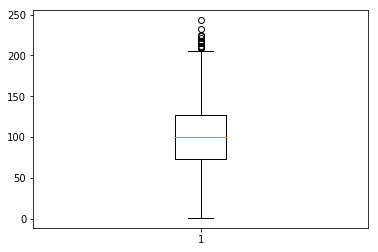

In [65]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(filtered_by_churn_0.toPandas()['Account_Length_C0'])
plt.show()

In [66]:
pdf = df5.toPandas()


In [67]:
pdf.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,VMail_Plan,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [68]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



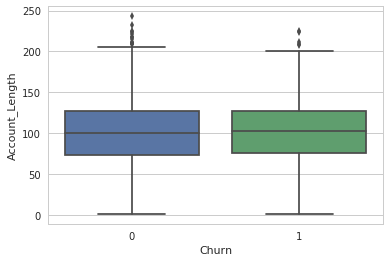

In [69]:
sns.boxplot(x="Churn", y="Account_Length", data=pdf);

In [70]:
pdf.dtypes

Account_Length      int64
VMail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Intl_Plan           int64
VMail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
Churn               int64
dtype: object

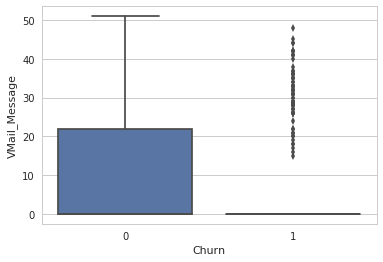

In [71]:
sns.boxplot(x="Churn",y="VMail_Message", data=pdf);

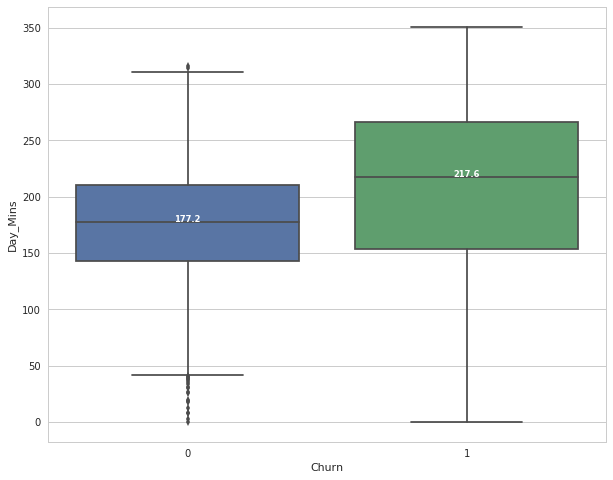

In [72]:
import numpy as np
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Day_Mins", data=pdf);

medians = pdf.groupby(['Churn'])['Day_Mins'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

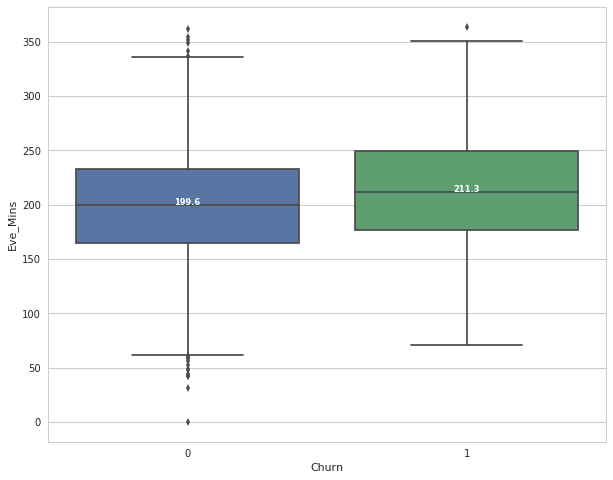

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Eve_Mins", data=pdf);
medians = pdf.groupby(['Churn'])['Eve_Mins'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

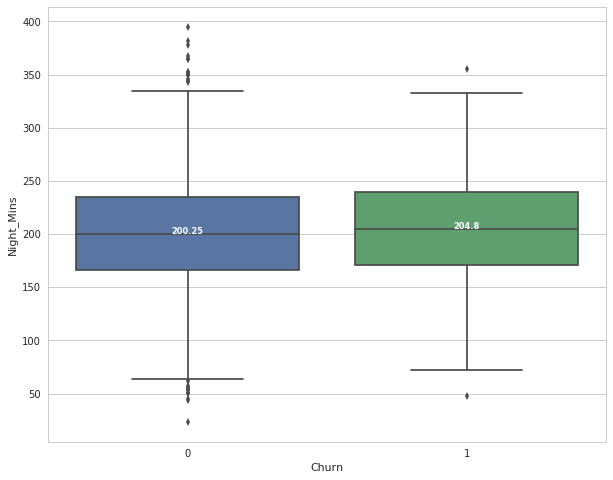

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Night_Mins", data=pdf);
medians = pdf.groupby(['Churn'])['Night_Mins'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

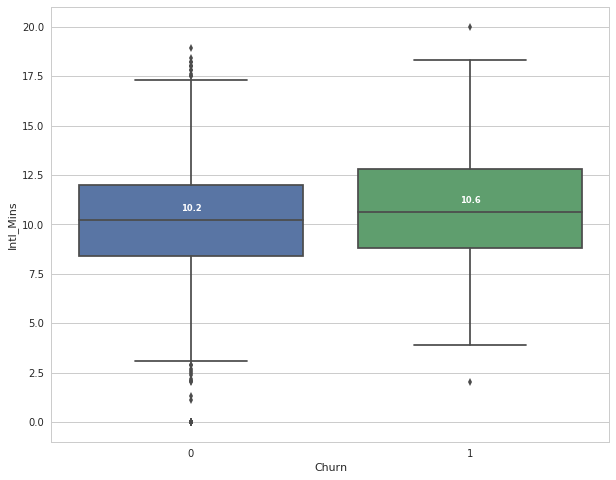

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Intl_Mins", data=pdf);
medians = pdf.groupby(['Churn'])['Intl_Mins'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

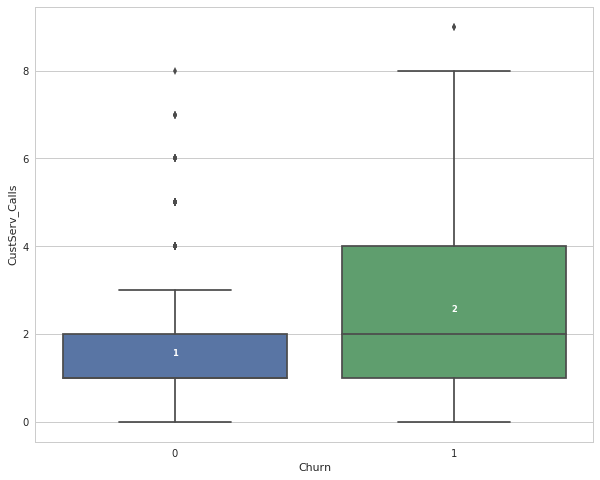

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="CustServ_Calls", data=pdf);

medians = pdf.groupby(['Churn'])['CustServ_Calls'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

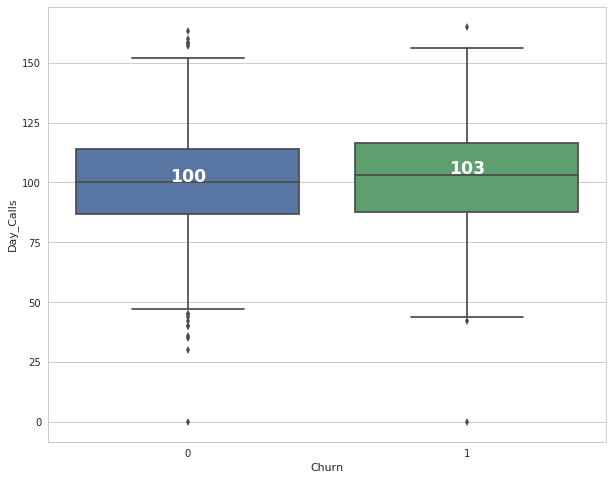

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Day_Calls", data=pdf);

medians = pdf.groupby(['Churn'])['Day_Calls'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='w', weight='semibold')

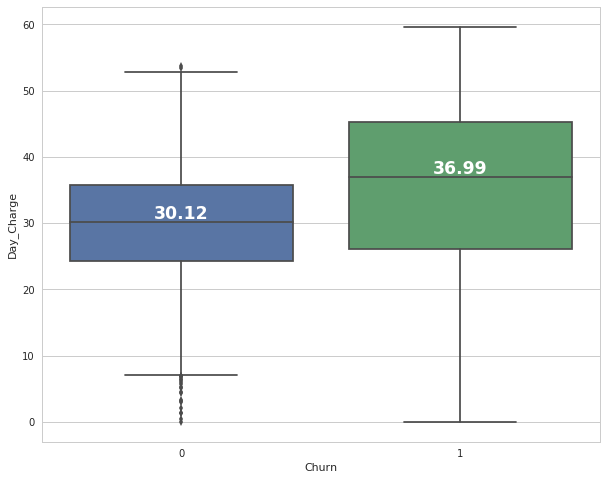

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Day_Charge", data=pdf);

medians = pdf.groupby(['Churn'])['Day_Charge'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='w', weight='semibold')

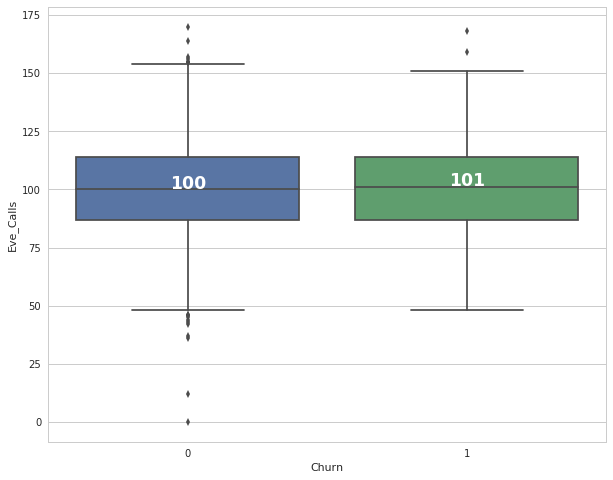

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Eve_Calls", data=pdf);

medians = pdf.groupby(['Churn'])['Eve_Calls'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='w', weight='semibold')

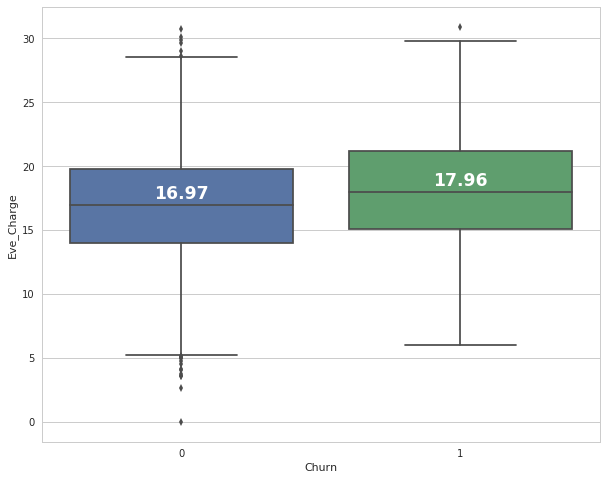

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Eve_Charge", data=pdf);

medians = pdf.groupby(['Churn'])['Eve_Charge'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='w', weight='semibold')

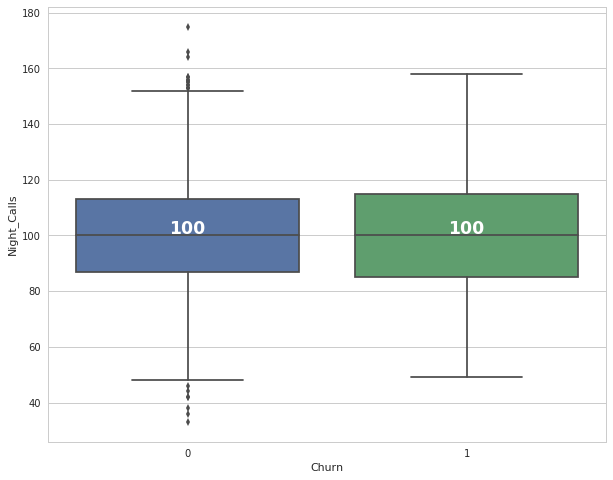

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Night_Calls", data=pdf);

medians = pdf.groupby(['Churn'])['Night_Calls'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='w', weight='semibold')

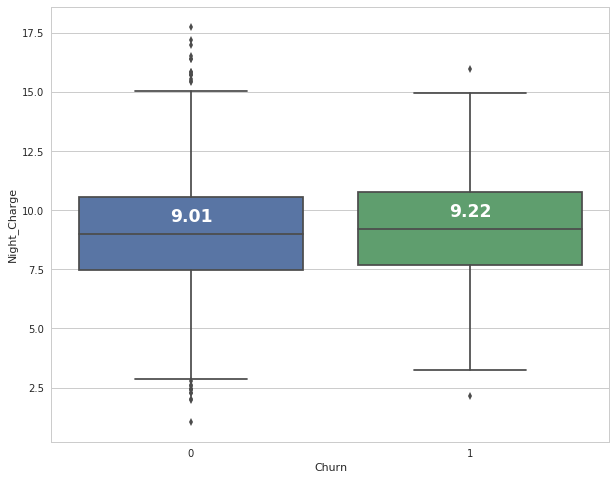

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="Churn",y="Night_Charge", data=pdf);

medians = pdf.groupby(['Churn'])['Night_Charge'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick],
            horizontalalignment='center', size='x-large', color='w', weight='semibold')

In [83]:
pdf.dtypes


Account_Length      int64
VMail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Intl_Plan           int64
VMail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
Churn               int64
dtype: object

### Convert State string values into different numerical categorical codes

In [84]:
pdf["State"] = pdf["State"].astype('category')

In [85]:
pdf.State.unique()

[KS, OH, NJ, OK, AL, ..., MS, TN, PA, CT, ND]
Length: 51
Categories (51, object): [KS, OH, NJ, OK, ..., TN, PA, CT, ND]

In [86]:
pdf["State"] = pdf["State"].cat.codes

In [87]:
pdf.State.unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28])

In [88]:
sdf = sqlContext.createDataFrame(pdf)

In [89]:
sdf.registerTempTable("CHURN_FINAL")

In [90]:
sqlContext.sql("select State from CHURN_FINAL limit 10").show()

+-----+
|State|
+-----+
|   16|
|   35|
|   31|
|   35|
|   36|
|    1|
|   19|
|   24|
|   18|
|   49|
+-----+



In [91]:
sqlContext.sql("select count(*) from CHURN_FINAL").show()

+--------+
|count(1)|
+--------+
|    3333|
+--------+



### Dropping phone as that is not a relevant column

In [92]:
sdf1 = sdf.drop('Phone')

In [93]:
sdf1.dtypes


[('Account_Length', 'bigint'),
 ('VMail_Message', 'bigint'),
 ('Day_Mins', 'double'),
 ('Eve_Mins', 'double'),
 ('Night_Mins', 'double'),
 ('Intl_Mins', 'double'),
 ('CustServ_Calls', 'bigint'),
 ('Intl_Plan', 'bigint'),
 ('VMail_Plan', 'bigint'),
 ('Day_Calls', 'bigint'),
 ('Day_Charge', 'double'),
 ('Eve_Calls', 'bigint'),
 ('Eve_Charge', 'double'),
 ('Night_Calls', 'bigint'),
 ('Night_Charge', 'double'),
 ('Intl_Calls', 'bigint'),
 ('Intl_Charge', 'double'),
 ('State', 'bigint'),
 ('Area_Code', 'bigint'),
 ('Churn', 'bigint')]

In [94]:
sdf1.show(5)

+--------------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+-----+
|Account_Length|VMail_Message|Day_Mins|Eve_Mins|Night_Mins|Intl_Mins|CustServ_Calls|Intl_Plan|VMail_Plan|Day_Calls|Day_Charge|Eve_Calls|Eve_Charge|Night_Calls|Night_Charge|Intl_Calls|Intl_Charge|State|Area_Code|Churn|
+--------------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+-----+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   16|      415|    0|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|        0|         1|      123|     27.47|  

In [95]:
#scaler = preprocessing.MinMaxScaler()


#min_max_scaler = preprocessing.MinMaxScaler()

#def scaleColumns(df, cols_to_scale):
#    for col in cols_to_scale:
#        df[col] = pd.DataFrame(min_max_scaler.fit_transform(sdf1[col]),columns=[col])
#    return df

In [96]:
#cols_to_scale = sdf1.columns

In [97]:
#sdf2 = scaleColumns(sdf1,cols_to_scale)

### 5.Calculate correlation of the dependent variable with the independent variables

### Prepare dataframe for getting correlation

In [98]:
from pyspark.sql import SparkSession

spark = SparkSession \
     .builder \
     .appName("Python Spark SQL basic example") \
     .getOrCreate()   

#### Creating vector assembler combining all columns

In [99]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["Account_Length", "VMail_Message", "Day_Mins","Eve_Mins","Night_Mins","Intl_Mins","CustServ_Calls","Intl_Plan","VMail_Plan", \
              "Day_Calls","Day_Charge","Eve_Calls","Eve_Charge","Night_Calls","Night_Charge","Intl_Calls","Intl_Charge", \
              "State","Area_Code","Churn"],
    outputCol="features")
output = assembler.transform(sdf1)
output.show()

+--------------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+-----+--------------------+
|Account_Length|VMail_Message|Day_Mins|Eve_Mins|Night_Mins|Intl_Mins|CustServ_Calls|Intl_Plan|VMail_Plan|Day_Calls|Day_Charge|Eve_Calls|Eve_Charge|Night_Calls|Night_Charge|Intl_Calls|Intl_Charge|State|Area_Code|Churn|            features|
+--------------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+-----+--------------------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   16|      415|    0|[128.0,25.0,265.1...|
|           107|           26|   161.6|   19

In [100]:
output.registerTempTable("OUTPUT_FINAL")
Output_Features =  sqlContext.sql("select features from OUTPUT_FINAL")
O_RDD = Output_Features.rdd
O_RDD.take(5)

[Row(features=DenseVector([128.0, 25.0, 265.1, 197.4, 244.7, 10.0, 1.0, 0.0, 1.0, 110.0, 45.07, 99.0, 16.78, 91.0, 11.01, 3.0, 2.7, 16.0, 415.0, 0.0])),
 Row(features=DenseVector([107.0, 26.0, 161.6, 195.5, 254.4, 13.7, 1.0, 0.0, 1.0, 123.0, 27.47, 103.0, 16.62, 103.0, 11.45, 3.0, 3.7, 35.0, 415.0, 0.0])),
 Row(features=DenseVector([137.0, 0.0, 243.4, 121.2, 162.6, 12.2, 0.0, 0.0, 0.0, 114.0, 41.38, 110.0, 10.3, 104.0, 7.32, 5.0, 3.29, 31.0, 415.0, 0.0])),
 Row(features=DenseVector([84.0, 0.0, 299.4, 61.9, 196.9, 6.6, 2.0, 1.0, 0.0, 71.0, 50.9, 88.0, 5.26, 89.0, 8.86, 7.0, 1.78, 35.0, 408.0, 0.0])),
 Row(features=DenseVector([75.0, 0.0, 166.7, 148.3, 186.9, 10.1, 3.0, 1.0, 0.0, 113.0, 28.34, 122.0, 12.61, 121.0, 8.41, 3.0, 2.73, 36.0, 415.0, 0.0]))]

### Scaling Columns in the data frame before calculating correlation

In [101]:
from pyspark.ml.feature import StandardScaler
O_RDD_withChurn = Output_Features.rdd
dataFrame = sqlContext.createDataFrame(O_RDD_withChurn)
dataFrame.show(5)

+--------------------+
|            features|
+--------------------+
|[128.0,25.0,265.1...|
|[107.0,26.0,161.6...|
|[137.0,0.0,243.4,...|
|[84.0,0.0,299.4,6...|
|[75.0,0.0,166.7,1...|
+--------------------+
only showing top 5 rows



In [102]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(dataFrame)

# Normalize each feature to have unit standard deviation.
scaledDataWC = scalerModel.transform(dataFrame)

In [103]:
scaledDataWC.show(20,truncate=True)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[128.0,25.0,265.1...|[3.21429510105554...|
|[107.0,26.0,161.6...|[2.68694981103861...|
|[137.0,0.0,243.4,...|[3.44030022534851...|
|[84.0,0.0,299.4,6...|[2.10938116006770...|
|[75.0,0.0,166.7,1...|[1.88337603577473...|
|[118.0,0.0,223.4,...|[2.96317829628557...|
|[121.0,24.0,218.2...|[3.03851333771656...|
|[147.0,0.0,157.0,...|[3.69141703011847...|
|[117.0,0.0,184.5,...|[2.93806661580858...|
|[141.0,37.0,258.6...|[3.54074694725649...|
|[65.0,0.0,129.1,2...|[1.63225923100476...|
|[74.0,0.0,187.7,1...|[1.85826435529773...|
|[168.0,0.0,128.8,...|[4.21876232013540...|
|[95.0,0.0,156.6,2...|[2.38560964531466...|
|[62.0,0.0,120.7,3...|[1.55692418957377...|
|[161.0,0.0,332.9,...|[4.04298055679642...|
|[85.0,27.0,196.4,...|[2.13449284054469...|
|[93.0,0.0,190.7,2...|[2.33538628436066...|
|[76.0,33.0,189.7,...|[1.90848771625172...|
|[73.0,0.0,224.4,1...|[1.8331526

In [104]:
scaledDataWC.registerTempTable("OUTPUT_FINAL_WITH_CHURN")
Output_Featuresc =  sqlContext.sql("select scaledFeatures from OUTPUT_FINAL_WITH_CHURN")
O_RDDCHURN = Output_Featuresc.rdd
O_RDDCHURN.take(5)

[Row(scaledFeatures=DenseVector([3.2143, 1.8264, 4.8671, 3.8924, 4.8385, 3.5819, 0.7602, 0.0, 2.2351, 5.4811, 4.8675, 4.9692, 3.8927, 4.6503, 4.8377, 1.2189, 3.582, 1.0793, 9.7944, 0.0])),
 Row(scaledFeatures=DenseVector([2.6869, 1.8994, 2.9669, 3.855, 5.0303, 4.9072, 0.7602, 0.0, 2.2351, 6.1288, 2.9667, 5.17, 3.8556, 5.2635, 5.031, 1.2189, 4.9086, 2.3609, 9.7944, 0.0])),
 Row(scaledFeatures=DenseVector([3.4403, 0.0, 4.4687, 2.3899, 3.2151, 4.3699, 0.0, 0.0, 0.0, 5.6804, 4.469, 5.5214, 2.3894, 5.3146, 3.2163, 2.0315, 4.3647, 2.0911, 9.7944, 0.0])),
 Row(scaledFeatures=DenseVector([2.1094, 0.0, 5.4969, 1.2206, 3.8933, 2.364, 1.5203, 3.3798, 0.0, 3.5378, 5.4971, 4.4171, 1.2202, 4.5481, 3.893, 2.8441, 2.3615, 2.3609, 9.6292, 0.0])),
 Row(scaledFeatures=DenseVector([1.8834, 0.0, 3.0605, 2.9243, 3.6956, 3.6177, 2.2805, 3.3798, 0.0, 5.6306, 3.0607, 6.1237, 2.9253, 6.1834, 3.6953, 1.2189, 3.6218, 2.4283, 9.7944, 0.0]))]

### Converting row objects to arrays 

In [105]:
O1_RDDCHURN = O_RDDCHURN.map(lambda x: np.array(x[0]))
O1_RDDCHURN.take(5)

[array([ 3.2142951 ,  1.82636855,  4.8671325 ,  3.89242824,  4.83846918,
         3.58186774,  0.76017241,  0.        ,  2.23514698,  5.48106724,
         4.86746785,  4.96922461,  3.89266847,  4.6503049 ,  4.83770438,
         1.21891053,  3.58198209,  1.0792645 ,  9.79436773,  0.        ]),
 array([ 2.68694981,  1.89942329,  2.96691291,  3.85496312,  5.03026792,
         4.9071588 ,  0.76017241,  0.        ,  2.23514698,  6.12882973,
         2.96670383,  5.17000137,  3.85555125,  5.26353192,  5.0310368 ,
         1.21891053,  4.90864213,  2.36089109,  9.79436773,  0.        ]),
 array([ 3.44030023,  0.        ,  4.46872897,  2.38987995,  3.21510048,
         4.36987864,  0.        ,  0.        ,  0.        ,  5.68037878,
         4.46895539,  5.52136068,  2.38942105,  5.31463418,  3.21634842,
         2.03151756,  4.36471151,  2.09107497,  9.79436773,  0.        ]),
 array([ 2.10938116,  0.        ,  5.4968671 ,  1.220574  ,  3.89331664,
         2.36403271,  1.52034482,  3.37975831

### Displaying correlation among variables

In [106]:
from pyspark.mllib.stat import Statistics

print(Statistics.corr(O1_RDDCHURN, method="pearson"))

[[  1.00000000e+00  -4.62782433e-03   6.21602053e-03  -6.75714199e-03
   -8.95519186e-03   9.51390234e-03  -3.79593893e-03   2.47346546e-02
    2.91840907e-03   3.84698823e-02   6.21413469e-03   1.92599670e-02
   -6.74530173e-03  -1.31762751e-02  -8.95953455e-03   2.06614284e-02
    9.54567480e-03   3.67762381e-03  -1.24634967e-02   1.65407422e-02]
 [ -4.62782433e-03   1.00000000e+00   7.78274099e-04   1.75620343e-02
    7.68113594e-03   2.85619588e-03  -1.32625831e-02   8.74548591e-03
    9.56926642e-01  -9.54806766e-03   7.75523459e-04  -5.86435129e-03
    1.75777801e-02   7.12306291e-03   7.66329043e-03   1.39573387e-02
    2.88365791e-03  -2.77621253e-02  -1.99437008e-03  -8.97279698e-02]
 [  6.21602053e-03   7.78274099e-04   1.00000000e+00   7.04251099e-03
    4.32336658e-03  -1.01545856e-02  -1.34231864e-02   4.93958241e-02
   -1.68406871e-03   6.75041388e-03   9.99999952e-01   1.57689932e-02
    7.02903525e-03   2.29724555e-02   4.30035704e-03   8.03335695e-03
   -1.00919742e-02

### 6.What is your overall conclusion based on the analysis that you just did? ( Use Hypothesis Testing) 

In [107]:
assembler = VectorAssembler(
    inputCols=["Account_Length", "VMail_Message", "Day_Mins","Eve_Mins","Night_Mins","Intl_Mins","CustServ_Calls","Intl_Plan","VMail_Plan", \
              "Day_Calls","Day_Charge","Eve_Calls","Eve_Charge","Night_Calls","Night_Charge","Intl_Calls","Intl_Charge", \
              "State","Area_Code"],
    outputCol="features")

In [110]:
assembler = VectorAssembler(
    inputCols=["Account_Length", "VMail_Message", "Day_Mins","Eve_Mins","Night_Mins","Intl_Mins","CustServ_Calls","Intl_Plan","VMail_Plan", \
              "Day_Calls","Day_Charge","Eve_Calls","Eve_Charge","Night_Calls","Night_Charge","Intl_Calls","Intl_Charge", \
              "State","Area_Code"],
    outputCol="features")
output50 = assembler.transform(sdf1)

In [111]:
output50.registerTempTable("OUTPUT_FINAL50")
Output_Features50 =  sqlContext.sql("select Churn,features from OUTPUT_FINAL50")

In [112]:
output50.registerTempTable("OUTPUT_FINAL50")
Output_Features50 =  sqlContext.sql("select Churn,features from OUTPUT_FINAL50")

In [113]:
O_RDD50 = Output_Features50.rdd
O_RDD50.take(5)

[Row(Churn=0, features=DenseVector([128.0, 25.0, 265.1, 197.4, 244.7, 10.0, 1.0, 0.0, 1.0, 110.0, 45.07, 99.0, 16.78, 91.0, 11.01, 3.0, 2.7, 16.0, 415.0])),
 Row(Churn=0, features=DenseVector([107.0, 26.0, 161.6, 195.5, 254.4, 13.7, 1.0, 0.0, 1.0, 123.0, 27.47, 103.0, 16.62, 103.0, 11.45, 3.0, 3.7, 35.0, 415.0])),
 Row(Churn=0, features=DenseVector([137.0, 0.0, 243.4, 121.2, 162.6, 12.2, 0.0, 0.0, 0.0, 114.0, 41.38, 110.0, 10.3, 104.0, 7.32, 5.0, 3.29, 31.0, 415.0])),
 Row(Churn=0, features=DenseVector([84.0, 0.0, 299.4, 61.9, 196.9, 6.6, 2.0, 1.0, 0.0, 71.0, 50.9, 88.0, 5.26, 89.0, 8.86, 7.0, 1.78, 35.0, 408.0])),
 Row(Churn=0, features=DenseVector([75.0, 0.0, 166.7, 148.3, 186.9, 10.1, 3.0, 1.0, 0.0, 113.0, 28.34, 122.0, 12.61, 121.0, 8.41, 3.0, 2.73, 36.0, 415.0]))]

In [115]:
O_RDD_withOUTChurn = Output_Features50.rdd
dataFrame = sqlContext.createDataFrame(O_RDD_withOUTChurn)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(dataFrame)

# Normalize each feature to have unit standard deviation.
scaledDataWITHOUTCHURN = scalerModel.transform(dataFrame)

### Scaled all the features except churn which is kept as separate column for hypothesis testing

In [116]:
scaledDataWITHOUTCHURN.show(20,truncate=True)

+-----+--------------------+--------------------+
|Churn|            features|      scaledFeatures|
+-----+--------------------+--------------------+
|    0|[128.0,25.0,265.1...|[3.21429510105554...|
|    0|[107.0,26.0,161.6...|[2.68694981103861...|
|    0|[137.0,0.0,243.4,...|[3.44030022534851...|
|    0|[84.0,0.0,299.4,6...|[2.10938116006770...|
|    0|[75.0,0.0,166.7,1...|[1.88337603577473...|
|    0|[118.0,0.0,223.4,...|[2.96317829628557...|
|    0|[121.0,24.0,218.2...|[3.03851333771656...|
|    0|[147.0,0.0,157.0,...|[3.69141703011847...|
|    0|[117.0,0.0,184.5,...|[2.93806661580858...|
|    0|[141.0,37.0,258.6...|[3.54074694725649...|
|    1|[65.0,0.0,129.1,2...|[1.63225923100476...|
|    0|[74.0,0.0,187.7,1...|[1.85826435529773...|
|    0|[168.0,0.0,128.8,...|[4.21876232013540...|
|    0|[95.0,0.0,156.6,2...|[2.38560964531466...|
|    0|[62.0,0.0,120.7,3...|[1.55692418957377...|
|    1|[161.0,0.0,332.9,...|[4.04298055679642...|
|    0|[85.0,27.0,196.4,...|[2.13449284054469...|


In [117]:
scaledDataWITHOUTCHURN.registerTempTable("OUTPUT_FINAL_WITHOUT_CHURN")
Output_FeaturescWITHOUTCHURN =  sqlContext.sql("select Churn,scaledFeatures from OUTPUT_FINAL_WITHOUT_CHURN")
O_RDDWITHOUTCHURN = Output_FeaturescWITHOUTCHURN.rdd
O_RDDWITHOUTCHURN.take(5)

[Row(Churn=0, scaledFeatures=DenseVector([3.2143, 1.8264, 4.8671, 3.8924, 4.8385, 3.5819, 0.7602, 0.0, 2.2351, 5.4811, 4.8675, 4.9692, 3.8927, 4.6503, 4.8377, 1.2189, 3.582, 1.0793, 9.7944])),
 Row(Churn=0, scaledFeatures=DenseVector([2.6869, 1.8994, 2.9669, 3.855, 5.0303, 4.9072, 0.7602, 0.0, 2.2351, 6.1288, 2.9667, 5.17, 3.8556, 5.2635, 5.031, 1.2189, 4.9086, 2.3609, 9.7944])),
 Row(Churn=0, scaledFeatures=DenseVector([3.4403, 0.0, 4.4687, 2.3899, 3.2151, 4.3699, 0.0, 0.0, 0.0, 5.6804, 4.469, 5.5214, 2.3894, 5.3146, 3.2163, 2.0315, 4.3647, 2.0911, 9.7944])),
 Row(Churn=0, scaledFeatures=DenseVector([2.1094, 0.0, 5.4969, 1.2206, 3.8933, 2.364, 1.5203, 3.3798, 0.0, 3.5378, 5.4971, 4.4171, 1.2202, 4.5481, 3.893, 2.8441, 2.3615, 2.3609, 9.6292])),
 Row(Churn=0, scaledFeatures=DenseVector([1.8834, 0.0, 3.0605, 2.9243, 3.6956, 3.6177, 2.2805, 3.3798, 0.0, 5.6306, 3.0607, 6.1237, 2.9253, 6.1834, 3.6953, 1.2189, 3.6218, 2.4283, 9.7944]))]

In [118]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql.functions import col
O1_RDDWITHOUTCHURN = O_RDDWITHOUTCHURN.map(lambda x: LabeledPoint(x[0],np.array(x[1])))
O1_RDDWITHOUTCHURN.take(5)

[LabeledPoint(0.0, [3.21429510106,1.8263685488,4.86713249675,3.89242823602,4.83846917823,3.58186773509,0.760172411589,0.0,2.2351469826,5.48106724073,4.86746784995,4.96922461469,3.8926684656,4.65030490367,4.83770438217,1.21891053368,3.581982092,1.07926449838,9.79436772503]),
 LabeledPoint(0.0, [2.68694981104,1.89942329075,2.96691290636,3.85496312128,5.03026791557,4.90715879708,0.760172411589,0.0,2.2351469826,6.12882973281,2.96670383488,5.1700013668,3.85555124542,5.26353192394,5.03103680071,1.21891053368,4.90864212608,2.3608910902,9.79436772503]),
 LabeledPoint(0.0, [3.44030022535,0.0,4.4687289691,2.38987995038,3.21510048378,4.36987863681,0.0,0.0,0.0,5.68037877675,4.46895539452,5.52136068299,2.38942104861,5.31463417562,3.21634841757,2.03151755613,4.36471151211,2.0910749656,9.79436772503]),
 LabeledPoint(0.0, [2.10938116007,0.0,5.49686710497,1.22057400106,3.89331663749,2.36403270516,1.52034482318,3.37975830761,0.0,3.53777976447,5.49709592994,4.4170885464,1.22022861317,4.54810040029,3.8930

In [119]:
featureTestResults = Statistics.chiSqTest(O1_RDDWITHOUTCHURN)

for i, result in enumerate(featureTestResults):
    print("Column %d:\n%s" % (i + 1, result))

Column 1:
Chi squared test summary:
method: pearson
degrees of freedom = 211 
statistic = 200.55931183864803 
pValue = 0.6859072560703092 
No presumption against null hypothesis: the occurrence of the outcomes is statistically independent..
Column 2:
Chi squared test summary:
method: pearson
degrees of freedom = 45 
statistic = 66.4593364622418 
pValue = 0.020381511965517518 
Strong presumption against null hypothesis: the occurrence of the outcomes is statistically independent..
Column 3:
Chi squared test summary:
method: pearson
degrees of freedom = 1666 
statistic = 2028.30585187346 
pValue = 2.0125191513287177E-9 
Very strong presumption against null hypothesis: the occurrence of the outcomes is statistically independent..
Column 4:
Chi squared test summary:
method: pearson
degrees of freedom = 1610 
statistic = 1626.725765324277 
pValue = 0.38000144288554183 
No presumption against null hypothesis: the occurrence of the outcomes is statistically independent..
Column 5:
Chi squared

### Not Significant 

* Account_Length
* Eve_Mins
* Night_Mins
* Eve_Calls
* Eve_Charge
* Night_Calls
* Night_Charge
* Area_Code


### Significant 

* VMail_Message
* Day_Calls


### Most Significant 

* Day_Mins
* Intl_Mins
* CustServ_Calls
* Intl_Plan
* VMail_Plan
* Day_Charge
* Intl_Calls
* Intl_Charge
* State
